In [1]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")
all_species = c("hsapiens", "mmulatta",'cjacchus','ptroglodytes','ggorilla' )

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
human <- read_csv("human_classes_subclass_1TPM_ensembl_name.csv")
gorilla <- read_csv("gorilla_classes_subclass_1TPM_ensembl_name.csv")
chimp <- read_csv("chimp_classes_subclass_1TPM_ensembl_name.csv")
macaque <- read_csv("macaque_classes_subclass_1TPM_ensembl_name.csv")
marmoset <- read_csv("marmoset_classes_subclass_1TPM_ensembl_name.csv")

New names:
• `` -> `...1`
Rows: 18128 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): gene, groups_expressed, groups_not_expressed, gene.1, exps_over_li...
dbl (16): ...1, mean_exp, min_exp, max_exp, max_2nd, n_exp, frac_exp, lim, n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 30843 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): gene, groups_expressed, groups_not_expressed, gene.1, exps_over_li...
dbl (16): ...1, mean_exp, min_exp, max_exp, max_2nd, n_exp, frac_exp, lim, n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 29889 Columns: 27
── Column specification ────

In [7]:
human_spec = human %>% group_by(spec_category) %>% count() %>% mutate(species = 'hsapiens')
gorilla_spec = gorilla %>% group_by(spec_category) %>% count() %>% mutate(species = 'ggorilla')
macaque_spec = macaque %>% group_by(spec_category) %>% count() %>% mutate(species = 'mmulatta')
chimp_spec = chimp %>% group_by(spec_category) %>% count() %>% mutate(species = 'ptroglodytes')
marmoset_spec = marmoset %>% group_by(spec_category) %>% count() %>% mutate(species = 'cjacchus')

In [17]:
order = c( 'lowly expressed', 'low cell type specificity', 'group enhanced', 'group enriched', 'cell type enhanced', 'cell type enriched')
all_species = c('cjacchus', "mmulatta",'ggorilla','ptroglodytes', "hsapiens")

In [52]:
fig_spec = rbind(human_spec, gorilla_spec, macaque_spec, chimp_spec, marmoset_spec) %>% 
group_by(species) %>% mutate(sum = sum(n)) %>% 
ungroup() %>% 
ggplot(aes(x = factor(species, levels = all_species), y = 100*(n/sum), 
           label = paste(round(100*(n/sum), digits = 2), "%"), fill = factor(spec_category, levels = rev(order)))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.2) +
geom_text(aes(color = ifelse(spec_category %in% c('group enhanced', 'group enriched', 'cell type enhanced', 'cell type enriched'), 'black', 'white')), 
          size = 3, position = position_stack(vjust = 0.5)) +
common_0x + 
scale_fill_viridis_d(name = 'Specificity class', direction = -1) +
scale_colour_manual(values=c("white"="white", "black"="black"), guide = 'none') +
labs(x = 'Species', y = 'Percentage of genes')


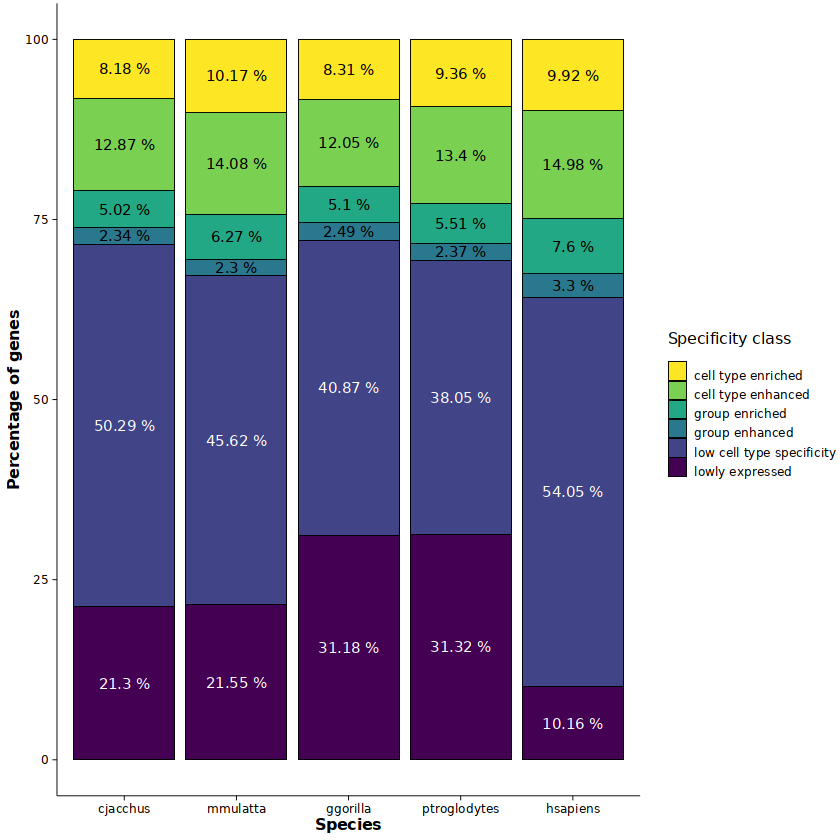

In [53]:
fig_spec

In [54]:
ggsave(plot = fig_spec, filename = 'specificity_species_pct_bar.png', width = 6, height = 4.2, dpi = 300)

In [38]:
human_dist = human %>% group_by(dist_category) %>% count() %>% mutate(species = 'hsapiens')
gorilla_dist = gorilla %>% group_by(dist_category) %>% count() %>% mutate(species = 'ggorilla')
macaque_dist = macaque %>% group_by(dist_category) %>% count() %>% mutate(species = 'mmulatta')
chimp_dist = chimp %>% group_by(dist_category) %>% count() %>% mutate(species = 'ptroglodytes')
marmoset_dist = marmoset %>% group_by(dist_category) %>% count() %>% mutate(species = 'cjacchus')

In [39]:
order_dist = c('expressed in over 90%','expressed in over 30%','expressed in less than 30%','expressed in single','lowly expressed')

In [55]:
fig_dist = rbind(human_dist, gorilla_dist, macaque_dist, chimp_dist, marmoset_dist) %>% 
group_by(species) %>% mutate(sum = sum(n)) %>% 
ungroup() %>% 
ggplot(aes(x = factor(species, levels = all_species), y = 100*(n/sum), 
           label = paste(round(100*(n/sum), digits = 2), "%"), fill = factor(dist_category, levels = order_dist))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.2) +
geom_text(aes(color = ifelse(dist_category %in% c('expressed in over 90%','expressed in over 30%'), 'black', 'white')), 
          size = 3, position = position_stack(vjust = 0.5)) +
common_0x +
scale_fill_viridis_d(option = 'plasma', name = 'Distribution class', direction = -1) + 
scale_colour_manual(values=c("white"="white", "black"="black"), guide = 'none') +
labs(x = 'Species', y = 'Percentage of genes')


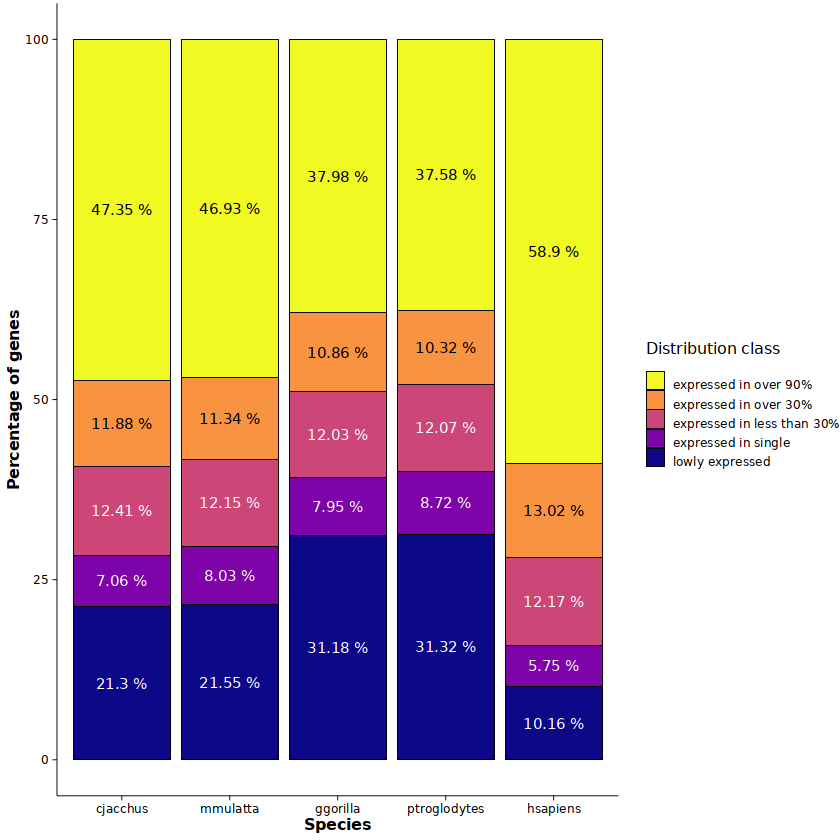

In [56]:
fig_dist

In [57]:
ggsave(plot = fig_dist, filename = 'distribution_species_pct_bar.png', width = 6, height = 4.2, dpi = 300)